In [1]:
from notebook.services.config import ConfigManager
cm = ConfigManager()
cm.update('livereveal', {
        'width': 1920,
        'height': 1080,
        'scroll': True,
})

{'width': 1920, 'height': 1080, 'scroll': True}

# Week 06 (Wednesday), AST 8581 / PHYS 8581 / CSCI 8581: Big Data in Astrophysics

### Michael Coughlin <cough052@umn.edu>, Michael Steinbach <stei0062@umn.edu>, Nico Adams adams900@umn.edu


with contributions totally ripped off from Gautham Narayan (UIUC)

# Where do we stand?

Foundations of Data and Probability -> Statistical frameworks (Frequentist vs Bayesian) -> Estimating underlying distributions -> Analysis of Time series (periodicity) -> Analysis of Time series (variability) -> Analysis of Time series (stochastic processes)

# Last Class: How do we check for variability? Learning to use emcee.

# Today: Stochastic Processes

If a system is always variable, but the variability is not (infinitely) predictable, then we have a [**stochastic**](https://en.wikipedia.org/wiki/Stochastic) process.  

Stochastic does not mean you cannot characterize this process, and make statistical statements about it.

# Common example: Active Galactic Nuclei (AGN)

Many galaxies have very bright nuclei, so bright that the central region can be more luminous than the remaining galaxy light. Much of the energy output of AGNs is non-thermal (i.e. non-stellar), with many AGN being strong emitters of optical, X-ray, radio and ultraviolet radiation. These AGN can vary in luminosity on short (hours or days) timescales. This means that the light or energy emitting source must be of order light hours or light days (respectively) in size, and gives clues as to the energy mechanism.

The non-stellar radiation from an AGN is theorized to result from the accretion of matter by a supermassive black hole at the center of its host galaxy. The observed characteristics of an AGN depend on several properties such as the mass of the central black hole, the rate of gas accretion onto the black hole, the orientation of the accretion disk, the degree of obscuration of the nucleus by dust, and presence or absence of jets.

Numerous subclasses of AGN have been defined based on their observed characteristics; the most powerful AGN are known as "quasars." A blazar is an AGN with a jet pointed toward the Earth, in which radiation from the jet is enhanced by relativistic beaming.

<img src="figures/quasar_schema.png" style="float: left; width: 40%; margin-right: 1%;"> <img src="figures/ngc4261-large.jpg" style="float: left; width: 50%; margin-right: 1%;">

AGN are notable for having spectra with both continuum and line emission in their spectra. The continuum emission is thought to come from the accretion disc and potentially the "jets" arising from the in-fall of matter that is then emitted as an extended beam (likely due to the magnetic fields) along the axis of rotation can also contribute to this component of the AGN emission. The emission is thought to come from cold material close to the central black hole moving at high speeds, causing a range of Doppler shifts of the emitted photons.

Take a (stochastically varying) quasar which has both *line* and *continuum* emission and where the line emission is stimulated by the continuum.  Since there is a physical separation between the regions that produce each type of emission, we get a delay between the light curves as can be seen here:

![Peterson 2001, RM](https://ned.ipac.caltech.edu/level5/Sept01/Peterson2/Figures/figure24.jpg)

How would we measure this?

## The correlation function

The autocorrelation of a time series can inform us about repeating patterns or serial correlation. The latter refers to the correlation between the signal at a given time and at a later time. The analysis of the autocorrelation can thereby inform us about the timescale of the fluctuations. 


### What is autocorrelation?
Autocorrelation is a type of serial dependence. Specifically, autocorrelation is when a time series is linearly related to a lagged version of itself. By contrast, correlation is simply when two independent variables are linearly related.


### Why autocorrelation matters

Often, one of the first steps in any data analysis is performing regression analysis. However, one of the assumptions of regression analysis is that the data has no autocorrelation. This can be frustrating because if you try to do a regression analysis on data with autocorrelation, then your analysis will be misleading.

Additionally, some time series forecasting methods (specifically regression modeling) rely on the assumption that there isn’t any autocorrelation in the residuals (the difference between the fitted model and the data). People often use the residuals to assess whether their model is a good fit while ignoring that assumption that the residuals have no autocorrelation (or that the errors are independent and identically distributed). This mistake can mislead people into believing that their model is a good fit when in fact it isn’t.

Finally, perhaps the most compelling aspect of autocorrelation analysis is how it can help us uncover hidden patterns in our data and help us select the correct forecasting methods. 

### How to determine if your time series data has autocorrelation
Instead of the auto-correlation function, we can look at the more general correlation function - this gives us information about the time delay between 2 processes.  

If one time series is derived from another simply by shifting the time axis by $t_{\rm lag}$, then their correlation function will have a peak at $\Delta t = t_{\rm lag}$.

The correlation function between $f(t)$, and $g(t)$ is defined as
# $${\rm CF}(\Delta t) = \frac{\lim_{T\rightarrow \infty}\frac{1}{T}\int_T f(t)g(t+\Delta t)dt }{\sigma_f \sigma_g}$$

Computing the correlation function is basically the mathematical processes of sliding the two curves over each other and computing the degree of similarity for each step in time.  

The peak of the correlation function reveals the time delay between the processes.  Below we have the correlation function of the line and continuum emission from a quasar, which reveals a $\sim$ 15 day delay between the two.

![Peterson 2001, RM](https://ned.ipac.caltech.edu/level5/Sept01/Peterson2/Figures/figure25.jpg)

### What can the auto correlation function (ACF) tell us?

If the values of $y$ are uncorrelated, then ACF$(\Delta t)=0$ (except for ACF$(0)=1$).

For processes that "retain memory" of previous states only for some characteristic time $\tau$, the ACF will vanish for $\Delta t \gg \tau$.

Turning that around, the predictability of future behavior of future behavior of such a process is limited to times up to $\sim \tau$; you have to "let the process run" to know how it will behave at times longer than that.

### The Structure Function

The *structure function* is another quantity that is frequently used in astronomy and is related to the ACF:

# $${\rm SF}(\Delta t) = {\sigma}_\infty[1 - {\rm ACF}(\Delta t)]^{1/2}$$

where ${\sigma}_\infty$ is the standard deviation of the time series as evaluated on timescales much larger than any charateristic timescale.

The structure function is interesting because it's equal to the standard deviation of the distribution of the differences of $y(t_2) - y(t_1)$ evaluated at many different $t_1$ and $t_2$ (i.e., with a time lag of $\Delta t = t_2 - t_1$), and divided by $\sqrt 2$.

This is of practical use: if I have a series of observations $y_i$ (taken at random times $t_i$) it's relatively straighforward to compute the structure function.

### Damped Random Walk

A DRW is described by a stochastic differential equation which includes a damping term that pushes $y(t)$ back towards the mean, hence the name **damped random walk**.   

The ACF for a DRW is given by

# $$ ACF(t) = \exp(-t/\tau)$$
where $\tau$ is the characteristic timescale (i.e., the damping timescale).

The DRW structure function (SF) can be written as
# $$ SF(t) = \sigma_{\infty}[1-\exp(-t/\tau)]^{1/2}$$

# Notice what's happening

We are **not** writing down a model for the observations directly anymore (they are a stochastic process so what'd be the point)

**We are writing down a model for how the observations are correlated with each other**

###  Structure Function for Dampled Random Walk

<img src="figures/MacLeod2010.png" alt="Drawing" style="width: 500px;"/>

The SF example above was an example of a DRW: the light curve is strongly correlated a short timescales, but uncorrelated at long timescales. 

This is observed in optical variability of quasar continuum light; in fact, it works so well that one can use this model to distinguish quasars from stars, based solely on the variability they exhibit.

If you can make the ACF or SF, then you can jolly well take it's Fourier Transform to get the:

### Power Spectral Density

The Fourier Transform of an ACF is the [Power Spectral Density (PSD)](https://en.wikipedia.org/wiki/Spectral_density).  So, the PSD is an analysis in frequency space and the ACF is in time space.

(the Wiener-Khinchin theorem describes the fact that the ACF and PSD are a Fourier pair) 

For example, for a sinusoidal function in time space, the ACF will have the same period, $T$. Conversly, the PSD in frequency space will be a $\delta$ function centered on $\omega = 1/2\pi T$.

For our nice quasar without an analytic model but with an analytic form for the ACF, the PSD is then:

# $$ PSD(f) = \frac{\tau^2 \sigma_{\infty}^2}{1+(2\pi f \tau)^2}$$

which means that a DRW is a $1/f^2$ process at high frequency. The **damped** part comes from the flat PSD at low frequency.

More generically, if 

## $${\rm SF} \propto t^{\alpha}$$

then 

## $${\rm PSD} \propto \frac{1}{f^{1+2\alpha}}$$

So an analysis of a stochastic system can be done with either the ACF, SF, or PSD.

### Different stochastic processes can be categorized based on their ACF/PSD

* A stochastic process with $1/f^2$ spectrum is known as random walk (if discrete) or Brownian motion (or, more accurately, Wiener process) if continuous. These physically occur when the value being observed is subjected to a series of independent changes of similar size. It's also sometimes called as "red noise". Quasar variability exhibits $1/f^2$ properties at high frequencies (that is, short time scales, below a year or so). 

* A stochastic process with $1/f$ spectrum are sometimes called "long-term memory processes" (also sometimes know as "pink noise"). They have equal energy at all octaves (or over any other logarithmic frequency interval). This type of process has infinite variance and an undefined mean (similar to a Lorentzian distribution). 

* A process with a constant PSD is frequently referred to as "white noise" -- it has equal intensity at all frequencies. This is a process with no memory -- each measurement is independent of all others. i.e. white noise is I.I.D 

# In-class warm-up: The Autocorrelation function

In [3]:
%matplotlib inline

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import random

plt.style.use('ggplot')
fig_size = [9,6]
plt.rcParams['figure.figsize'] = fig_size


We're going to start again by generating a series of white noise (Gaussian with mean 0 and standard deviation 1).

<AxesSubplot:>

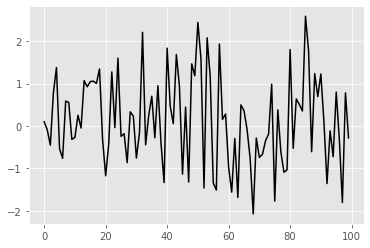

In [4]:
# Create and plto our white noise series
wn_series = pd.Series([random.gauss(0.0, 1.0) for i in range(100)])
wn_series.plot(color='k')

Next, we'll take a look at the autocorrelation function for this series. But first, what is autocorrelation?

<AxesSubplot:xlabel='Lag', ylabel='Autocorrelation'>

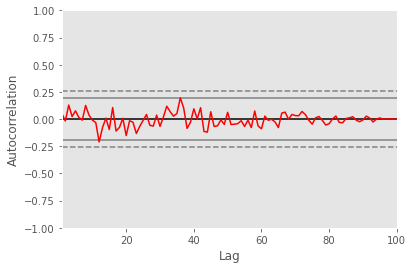

In [6]:
# The first line imports a tool made specifically for plotting autocorrelation
# the second line actually generates the plot.
# The horizontal lines in the plot correspond to 95% and 99% confidence bands.

from pandas.plotting import autocorrelation_plot
autocorrelation_plot(wn_series, color='r')

So what are we looking at in the above plot?...

Recall that autocorrelation is a measure of correlation between a time series and a lagged version of itself. Autocorrelation coefficients range from 1.0 to -1.0 (y-axis). The x-axis (lag) represents the gap between current values and past values. For example, the y-value at lag 1 (x=1) indicates the strenth of correlation between a time series and a version of itself that is shifted one-step in time. The y-value at lag 2 (x=2) indicates the strength of correlation at a two-step shift, and so on. The solid black band represents the 95% confidence band around zero and the dashed black line represents the 99% confidence band around zero. There are some statistical assumptions that determine these two confidence bands that we won't get into here. For now note that values inside the confidence bands as not considered to be statistically significant levels of autocorrelation.

### Now let us look at an example of noise plus signal

We'll use a sine wave since it has a clearly defined, repeating structure, and we'll add a little random noise to it for a variability.

In [8]:
# Create a sine wave and then add noise to it.
#noisy_sine = pd.Series(...

In [9]:
# Plot the data you just created

In [10]:
# The regular repeating structure should be clearly apparent in the above plot and it should be reminiscent of a basic
# sine wave. Now plot it's autocorrelation function.

This is certainly a bit different from the first autocorrelation plot, what information can we get from this plot? Is there autocorrelation present? Is it positive or negative? Does the autocorrelation taper off quickly, or does it persist for a number of lags?

## Where we stand

If you get a time-series:

# $$ (t_1, m_1), (t_2, m_2), ... , (t_N, m_n) $$

- and you get luck enough to have a parametric model then you know what to do from first half of semester
- you can say something about the **correlation structure** (*even if no explicit model for observations*)
    - periodic processes
        - periodogram to find strong periods
        - can express as Fourier sum to construct a model and make predictions at future times
    - stochastic processes
        - ACF/SF
        - PSD
            - These are good for **characterizing** stochastic processes
                - can use *features* for tasks like *classification* (soon! week 11!) 
                
## But we're scientists and like to predict things (i.e. forecasting), not just characterize them - how do we do that for a generic time-series/process without an explicit model?

## Autoregressive Processes

Processes (like time-series) that "retain memory" of previous states, can be described by [autoregressive models](https://en.wikipedia.org/wiki/Autoregressive_model).

### You have already seen one of these:

Our old friend the random walk - every new value is given by the preceeding value plus some noise:

# $$y_i = y_{i-1} + \epsilon_i$$

If the coefficient of $y_{i-1}$ is $>1$ then it is known as a geometric random walk, which is typical of the stock market. These are **Markov Chains** 

(recall that not all Markov chains are stationary - they have to be positive recurrent and irreducible - i.e. you have to be able to get from every state to every other state in some finite time - it'd be dull if the stock market was stationary)

So, if you interview for a quant position on Wall Street, you tell them that you are an expert in using autoregressive geometric random walks to model stochastic processes.

In the random walk case above, each new value depends only on the immediately preceeding value.  But we can generalized this to include $p$ values:

# $$y_i = \sum_{j=1}^pa_jy_{i-j} + \epsilon_i$$

We refer to this as an [**autoregressive (AR)**](https://en.wikipedia.org/wiki/Autoregressive_model) process of order $p$: $AR(p)$.  

For a random walk, we have $p=1$, and the weights are just $a_1=1$.

If the data are drawn from a "stationary" process (one where it doesn't matter what region of the light curve you sample [so long as it is representative]), the $a_j$ satisfy certain conditions.

One thing that we might do then is ask whether a system is more consistent with $a_1=0$ or $a_1=1$ (noise vs. a random walk).

## An aside:

You might wonder why the stock market is well described by a geometric random walk, and doesn't need an AR(10) or something. Recall that geometric random walks are also good at describing the motions of inebriated humans. Most economic theory is based on the assumption of people being "Rational actors", leading to "Efficient Markets." 

Larry Summers would famously dispute this notion with the first line of a unpublished paper:
"There are idiots, look around."

Here are some example light curves for specific $AR(p)$ processes.  

![AR Examples](https://upload.wikimedia.org/wikipedia/commons/thumb/c/ce/ArTimeSeries.svg/1000px-ArTimeSeries.svg.png)

* $AR(0)$: the light curve is simply responding to noise fluctuations.  


* $AR(1)$: the noise fluctuation responses are persisting for slightly longer as the next time step depends positively on the time before.  


* $AR(1)$ w/ $a_1 = 0.9$: nearly the full effect of the noise spike from the previous time step is applied again, giving particularly long and high chains of peaks and valleys.  


* $AR(2)$:  we have long, but low chains of peaks and valleys as a spike persists for an extra time step.  


* $AR(2)$ w/ $a_1 = 0.9$ and $a_2 = -0.8$: the response of a spike in the second time step has the opposite sign as for the first time step - both have large coefficients - peaks and valleys are both quite high and quite narrowly separated.

i.e. More general than simple periodic processes

## Moving Average Processes

A [**moving average (MA)**](https://en.wikipedia.org/wiki/Moving-average_model) process is similar to an AR process, but instead the value at each time step depends not on the *value* of previous time step, but rather the *perturbations* from previous time steps.  It is defined as

# $$y_i = \epsilon_i + \sum_{j=1}^qb_j\epsilon_{i-j}$$

So, for example, an MA(q=1) process would look like

# $$y_i = \epsilon_{i} + b_1\epsilon_{i-1},$$

whereas an AR(p=2) process would look like

# $$y_i = a_1y_{i-1} +  a_2y_{i-2} + \epsilon_i$$


### So, in an $MA$ process a shock affects only the current value and $q$ values into the future.  In an $AR$ process a shock affects *all* future values. 

## You can combine AR and MA processes. These are creatively called ARMA processes

E.g. ARMA(2,1) model, which combines AR(2) and MA(1):


# $$y_i = a_1y_{i-1} +  a_2y_{i-2} + \epsilon_i + b_1 \epsilon_{i-1}$$

# In-class Warm-up: AR vs MA vs ARMA processes with a single shock

Generate data from 
* an $AR(2)$ w/ $a_1 = 0.5, a_2=0.2$
* an $MA(2)$ w/ $b_1 = 0.5, b_2=0.5$
* an $ARMA(2, 1)$ w/ $a_1 = 0.5, a_2=0.25, b_1 =0.5$

Add a "shock" (high epsilon value of 15 at t=3) - see how the different procsses respond

In [ ]:
%matplotlib inline
import numpy as np
from matplotlib import pyplot as plt
from matplotlib.ticker import MultipleLocator

N=20


epsilon = np.random.randn(N+2)
epsilon[3] = # complete me

yAR=np.zeros(N+2)
yMA=np.zeros(N+2)
yARMA=np.zeros(N+2)

for i in np.arange(N)+2:
    yAR[i] = # complete me 
    yMA[i] = # complete me
    yARMA[i] = # complete me

fig = plt.figure(figsize=(6, 6))
t = np.arange(len(yAR))
plt.plot(t,yAR,label="AR(2), a_1=0.5, a_2=0.2")
plt.plot(t,yMA,label="MA(2), b_1=0.5, b_2=0.5")
plt.plot(t,yARMA,label="ARMA(2,1), a_1=0.5, a_2=0.25, b_1=0.5",zorder=0)
plt.xlabel("t")
plt.ylabel("y")
plt.legend(loc="upper right",prop={'size':8})

ax = plt.axes()

plt.show()

These videos might be useful:

[MA(1)](https://www.youtube.com/watch?v=lUhtcP2SUsg)

[AR(1)](https://www.youtube.com/watch?v=AN0a58F6cxA)

[ARMA(1,1)](https://www.youtube.com/watch?v=Pg0RnP1uLVc)

### CARMA Models

$AR$ and $ARMA$ models assume evenly sampled time-series data.  However, we can extend this to unevenly sampled data.

These are **continuous** ARMA or CARMA models.


A $CAR(1)$ process is described by a stochastic differential equation which includes a damping term that pushes $y(t)$ back towards the mean, so it is also a **damped random walk (DRW)**.  

For evenly sampled data a CAR(1) process is the same as an AR(1) process with $a_1=\exp(-1/\tau)$.  

That is, the next value is the previous value times the damping factor (plus noise).

### Connecting this back to the ACF/SF/PSD

The ACF for a DRW is given by
# $$ ACF(t) = \exp(-t/\tau),$$
where $\tau$ is the characteristic timescale (i.e., the damping timescale).

The structure function can be written as
# $$ SF(t) = SF_{\infty}[1-\exp(-t/\tau)]^{1/2}.$$

The PSD is then
# $$ PSD(f) = \frac{\tau^2 SF_{\infty}^2}{1+(2\pi f \tau)^2},$$


which means that a DRW is a $1/f^2$ process at high frequency.  

The *damped* part comes from the flat PSD at low frequency.

# In-class Exercise: Stochastic Processes and the ACF

AstroML has [time series](http://www.astroml.org/modules/classes.html#module-astroML.time_series) and [Fourier](http://www.astroml.org/modules/classes.html#module-astroML.fourier) tools for generating light curves drawn from a power law in frequency space.  

Note that these tools define $\beta = 1+2\alpha$  ($\beta=2$ for a random walk). 

In [12]:
# RUN THIS
import numpy as np
from matplotlib import pyplot as plt
from astroML.time_series import generate_power_law
from astroML.fourier import PSD_continuous

In [13]:
N = 2014
dt = 0.01

betaRed = # Complete
betaPink = # Complete
betaWhite = # Complete

t = dt * np.arange(N)
yRed = generate_power_law(N, dt, betaRed)
yPink = # Complete
yWhite = # Complete

fRed, PSDred = PSD_continuous(t, yRed)
fPink, PSDpink = PSD_continuous(t, yPink)
fWhite, PSDwhite = PSD_continuous(t, yWhite)
  

In [ ]:
fig = plt.figure(figsize=(8, 4))
ax1 = fig.add_subplot(121)
ax1.plot(t, yWhite, c='Grey')
ax1.plot(t, yPink, c='Pink')
ax1.plot(t, yRed, '-r')
ax1.set_xlim(0, 10)
ax1.set_title('Real Space')
ax1.set_xlabel('time')
ax1.set_ylabel('fake mag')

ax2 = fig.add_subplot(122, xscale='log', yscale='log')
ax2.plot(fWhite, PSDwhite, c='Grey')   
ax2.plot(fPink, PSDpink, c='Pink')  
ax2.plot(fRed, PSDred, '-r')  
ax2.set_xlim(1E-1, 60)
ax2.set_ylim(1E-11, 1E-3)
ax2.set_xlabel('Frequency')
ax2.set_xlabel('Power')
ax2.set_title('PSD')

plt.show()

# APPENDIX: ACF for Unevenly Sampled Data

astroML also has tools for computing the ACF of unevenly sampled data using two different (Scargle) and (Edelson & Krolik) methods: [http://www.astroml.org/modules/classes.html#module-astroML.time_series](http://www.astroml.org/modules/classes.html#module-astroML.time_series)

One of the tools is for generating a **damped random walk (DRW)**.  Above we found that a random walk had a $1/f^2$ PSD.  A *damped* random walk is a process "remembers" its history only for a characteristic time, $\tau$. The ACF vanishes for $\Delta t \gg \tau$.

In [15]:
# Syntax for EK and Scargle ACF computation
import numpy as np
from astroML.time_series import generate_damped_RW
from astroML.time_series import ACF_scargle, ACF_EK

t = np.arange(0,1000)
y = generate_damped_RW(t, tau=300)
dy = 0.1
y = np.random.normal(y,dy)

ACF_scargle, bins_scargle = ACF_scargle(t,y,dy)
ACF_EK, ACF_err_EK, bins_EK = ACF_EK(t,y,dy)

        Use astropy.stats.LombScargle instead. [astroML.time_series.ACF]
        Use astropy.stats.LombScargle instead. [astroML.time_series.ACF]


        Use astropy.stats.LombScargle instead. [astroML.time_series.ACF]
        Use astropy.stats.LombScargle instead. [astroML.time_series.ACF]


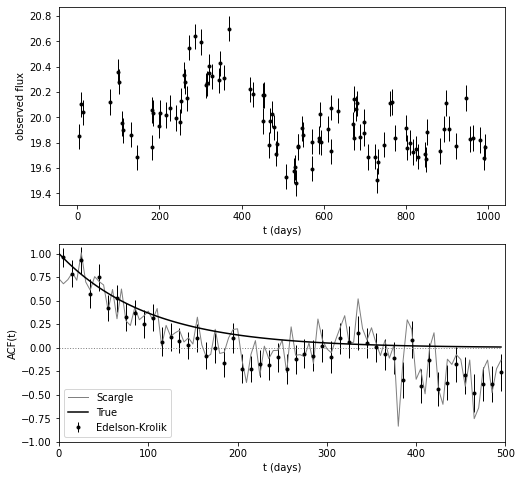

In [16]:
# Ivezic, Figure 10.30
# Author: Jake VanderPlas
# License: BSD
#   The figure produced by this code is published in the textbook
#   "Statistics, Data Mining, and Machine Learning in Astronomy" (2013)
#   For more information, see http://astroML.github.com
#   To report a bug or issue, use the following forum:
#    https://groups.google.com/forum/#!forum/astroml-general
import numpy as np
from matplotlib import pyplot as plt

from astroML.time_series import lomb_scargle, generate_damped_RW
from astroML.time_series import ACF_scargle, ACF_EK

#------------------------------------------------------------
# Generate time-series data:
#  we'll do 1000 days worth of magnitudes

t = np.arange(0, 1E3)
z = 2.0
tau = 300
tau_obs = tau / (1. + z)

np.random.seed(6)
y = generate_damped_RW(t, tau=tau, z=z, xmean=20)

# randomly sample 100 of these
ind = np.arange(len(t))
np.random.shuffle(ind)
ind = ind[:100]
ind.sort()
t = t[ind]
y = y[ind]

# add errors
dy = 0.1
y_obs = np.random.normal(y, dy)

#------------------------------------------------------------
# compute ACF via scargle method
C_S, t_S = ACF_scargle(t, y_obs, dy, n_omega=2 ** 12, omega_max=np.pi / 5.0)

ind = (t_S >= 0) & (t_S <= 500)
t_S = t_S[ind]
C_S = C_S[ind]

#------------------------------------------------------------
# compute ACF via E-K method
C_EK, C_EK_err, bins = ACF_EK(t, y_obs, dy, bins=np.linspace(0, 500, 51))
t_EK = 0.5 * (bins[1:] + bins[:-1])

#------------------------------------------------------------
# Plot the results
fig = plt.figure(figsize=(8, 8))

# plot the input data
ax = fig.add_subplot(211)
ax.errorbar(t, y_obs, dy, fmt='.k', lw=1)
ax.set_xlabel('t (days)')
ax.set_ylabel('observed flux')

# plot the ACF
ax = fig.add_subplot(212)
ax.plot(t_S, C_S, '-', c='gray', lw=1, label='Scargle')
ax.errorbar(t_EK, C_EK, C_EK_err, fmt='.k', lw=1, label='Edelson-Krolik')
ax.plot(t_S, np.exp(-abs(t_S) / tau_obs), '-k', label='True')
ax.legend(loc=3)

ax.plot(t_S, 0 * t_S, ':', lw=1, c='gray')

ax.set_xlim(0, 500)
ax.set_ylim(-1.0, 1.1)

ax.set_xlabel('t (days)')
ax.set_ylabel('ACF(t)')

plt.show()